# Reto: Análisis de Datos de Ventas de Videojuegos
### Objetivo:

Realizar un análisis exploratorio de un conjunto de datos sobre ventas de videojuegos a nivel mundial para responder preguntas específicas y extraer insights valiosos sobre las tendencias de la industria.



In [10]:
# 1. Carga y limpieza de datos:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_games = pd.read_csv('videojuegos.csv')
df_games.head()

,Nombre,Plataforma,Año_de_lanzamiento,Género,Editor,Ventas_NA,Ventas_EU,Ventas_JP,Ventas_Otros,Ventas_Global
0,Super Mario Bros.,NES,1985,Platform,Nintendo,8.91,2.41,2.61,1.13,8.22
1,Call of Duty: Infinite Warfare,PS4,2016,Shooter,Activision,9.66,6.88,2.79,2.11,7.93
2,The Legend of Zelda: Breath of the Wild,Switch,2017,Action-Adventure,Nintendo,9.76,2.96,0.73,0.82,16.21
3,FIFA 21,PS4,2020,Sports,EA Sports,4.34,2.95,0.13,0.88,8.22
4,Minecraft,PC,2011,Sandbox,Mojang,3.50,1.24,4.82,1.19,16.42


In [11]:
# 2. Análisis exploratorio
# Calcular el número total de juegos lanzados por año.

games_per_year = df_games['Año_de_lanzamiento'].value_counts()
games_per_year

Año_de_lanzamiento
2016    3
2020    2
1985    1
2017    1
2011    1
2015    1
2013    1
Name: count, dtype: int64

In [12]:
# Determinar los  géneros más populares en términos de cantidad de juegos.

most_popular = df_games['Género'].value_counts()
most_popular[0:5]

Género
Shooter             2
Action-Adventure    2
Platform            1
Sports              1
Sandbox             1
Name: count, dtype: int64

In [13]:
# 3. Análisis de ventas:
# Calcular las ventas totales por región y compararlas.

region = df_games[['Ventas_NA', 'Ventas_JP', 'Ventas_EU', 'Ventas_Otros']].sum()
region = region.sort_values(ascending = False)
region

Ventas_NA       46.27
Ventas_EU       38.99
Ventas_JP       29.13
Ventas_Otros    12.49
dtype: float64

In [14]:
# Encontrar el videojuego más vendido de cada género.

most_sell = df_games.loc[df_games.groupby(['Género'])['Ventas_Global'].idxmax()]
most_sell 

,Nombre,Plataforma,Año_de_lanzamiento,Género,Editor,Ventas_NA,Ventas_EU,Ventas_JP,Ventas_Otros,Ventas_Global
2,The Legend of Zelda: Breath of the Wild,Switch,2017,Action-Adventure,Nintendo,9.76,2.96,0.73,0.82,16.21
7,Pokemon Go,Mobile,2016,Augmented Reality,Niantic,2.35,3.47,4.73,0.67,7.29
0,Super Mario Bros.,NES,1985,Platform,Nintendo,8.91,2.41,2.61,1.13,8.22
5,The Witcher 3: Wild Hunt,PS4,2015,RPG,CD Projekt,1.68,5.45,4.46,1.46,6.75
4,Minecraft,PC,2011,Sandbox,Mojang,3.50,1.24,4.82,1.19,16.42
1,Call of Duty: Infinite Warfare,PS4,2016,Shooter,Activision,9.66,6.88,2.79,2.11,7.93
9,Animal Crossing: New Horizons,Switch,2020,Simulation,Nintendo,3.35,4.27,2.83,0.98,11.36
3,FIFA 21,PS4,2020,Sports,EA Sports,4.34,2.95,0.13,0.88,8.22


In [15]:
most_sell_2 = df_games.groupby('Género').agg({'Nombre': 'unique', 'Ventas_Global': 'max'})
most_sell_2

,Nombre,Ventas_Global
Género,,
Action-Adventure,"[The Legend of Zelda: Breath of the Wild, GTA V]",16.21
Augmented Reality,[Pokemon Go],7.29
Platform,[Super Mario Bros.],8.22
RPG,[The Witcher 3: Wild Hunt],6.75
Sandbox,[Minecraft],16.42
Shooter,"[Call of Duty: Infinite Warfare, Overwatch]",7.93
Simulation,[Animal Crossing: New Horizons],11.36
Sports,[FIFA 21],8.22


[Text(0.5, 0, 'Año de lanzamiento'), Text(0, 0.5, 'Numero de juegos')]

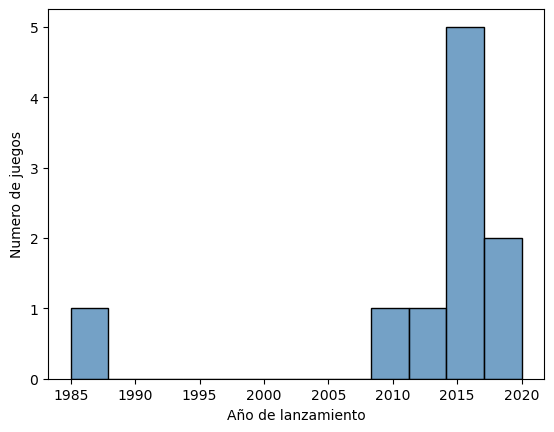

In [18]:
ax = sns.histplot(data=df_games, x='Año_de_lanzamiento', color='steelblue')
ax.set(xlabel='Año de lanzamiento', ylabel="Ventas_Global", hue=)

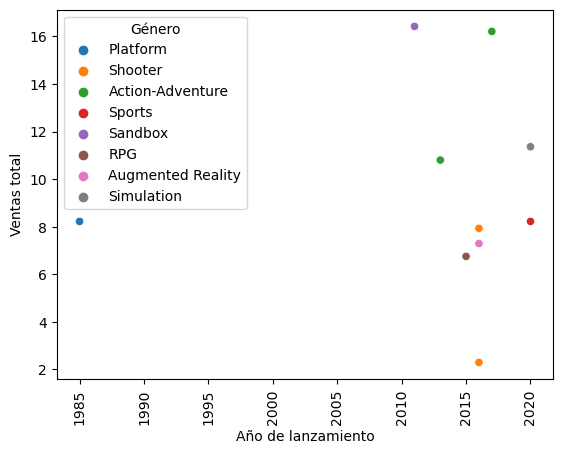

In [30]:
ax1 = sns.scatterplot(data=df_games, x='Año_de_lanzamiento', y='Ventas_Global', hue='Género')
ax1.set(xlabel='Año de lanzamiento', ylabel='Ventas total')
ax1.tick_params(axis='x', rotation=90)